In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import haar_like_feature_coord, haar_like_feature, draw_haar_like_feature

# Haar特征

Haar特征个数计算公式如下所示：

$$XY(W+1-w\frac{X+1}{2})(H+1-h\frac{Y+1}{2})$$
$$X=[\frac{W}{w}], Y=[\frac{H}{h}]$$

上述公式可以按照下述方式理解：

- 对于某特定大小的特征，在窗口内滑动计算。
也就是如图1（a）特征大小为2*1，对于24*24的图像。水平可滑动23步，垂直滑动24步，所以共有23*24个特征。

- 对于一个特征，特征本身沿水平、竖直方向分别缩放。
还看特征1（a），特征大小为2*1，则延水平方向可放大为：4*1，6*1，8*1，…，24*1；竖直方向可放大为：2*1，2*2，2*3，…，2*24。即每个特征有XY种放大方式。（！放大的矩形特征并限制保持2:1的比例！）

---
## 参考资料

[【图像处理】计算Haar特征个数](https://blog.csdn.net/xiaowei_cqu/article/details/8216109)

In [2]:
# haar_like_feature_coord?

In [3]:
img = np.zeros((3, 3))

In [4]:
height, width = img.shape

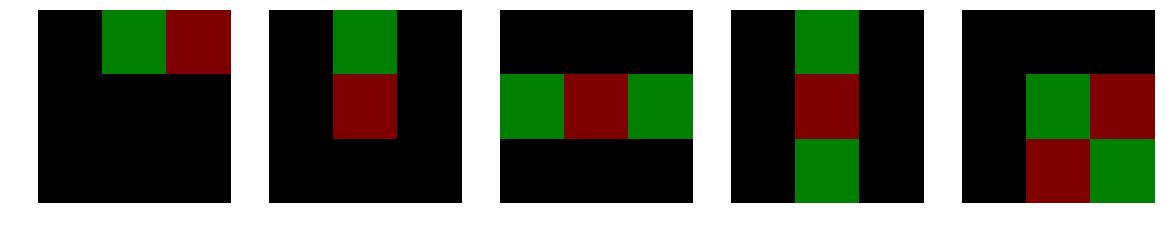

In [5]:
feat_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4']
feat_types_len = len(feat_types)
plt.figure(figsize=(20, 20))
for feat_index, feat_type in enumerate(feat_types):
    feat_coord, feat_type = haar_like_feature_coord(width, height, feat_type)
    haar_feature = draw_haar_like_feature(img, 0, 0, height, width, feat_coord, max_n_features=1, random_state=1)
    plt.subplot(1, feat_types_len, feat_index+1)
    plt.imshow(haar_feature)
    plt.axis('off')

In [6]:
# 24x24
img = np.zeros((24, 24))
height, width = img.shape
feat_coord, feat_type = haar_like_feature_coord(width, height)
print('24x24 image has {} haar features'.format(len(feat_coord)))

24x24 image has 161864 haar features


In [7]:
def haar_count(W, H, w, h):
    X = int(W/w)
    Y = int(H/h)
    return X*Y*(W+1-w*(X+1)/2)*(H+1-h*(Y+1)/2)
whs = [(2, 1), (1, 2), (3, 1), (1, 3), (2, 2)]
harr_num = 0
for w, h in whs:
    harr_num += haar_count(24, 24, w, h)
print('haar_num:', harr_num)

('haar_num:', 170496)
